## 2a Pràctica IA: Machine Learning


En aquesta pràctica el nostre objectiu és aplicar diferents classificadors a un problema real. En el nostre cas, prediurem les probabilitats de sobreviure al Titanic segons unes característiques elegides.

### 1 Exploratory Data Analysis


#### 1.1 Imports Necessaris

In [1]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,log_loss
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
from io import StringIO

#### 1.1 Carregar dataset

Primer de tot, ens encarrem de carregar el dataset amb la llibreria pandas.

In [2]:
data=pd.read_csv("./dades.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1.2 Observació de dades

Durant aquesta fase de la EDA, hem de obtenir la màxima informació del dataset possible, mitjançant gràfics i altres mesures. Anem a veure les primeres instàncies del dataset:

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


De moment, podem observar que les característiques del nostre dataset són categòriques o numèriques. EXPLICAR ALGO JOAN PLS AJUDA

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Després d'haver vist la descripció amb les primeres files del dataset podem observar qiue ens trobam davant un dataset amb 891 mostres amb 11 característiques, descartant la de survived. Si el nostre objectiu és prediure la supervivència, anem a veure quina informació podem concloure del nostre dataset.

#### 1.2.1 Edat

Primer de tot, veurem la quantitat de gent que hi ha i la mitja d'edat.

Gent de3 ha sobreviscut:  2
hola 3
2.0


Text(0, 0.5, 'Quantitat')

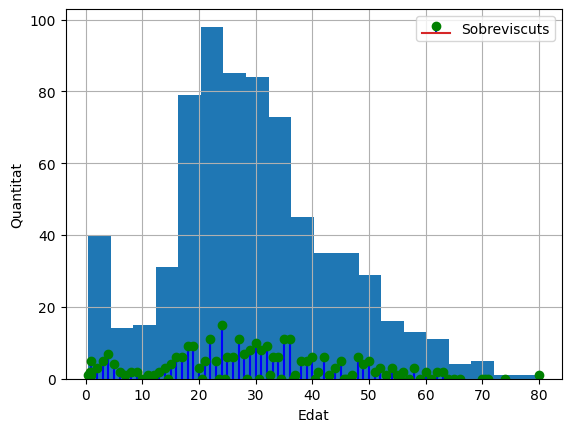

In [5]:
data.Age.hist(bins=20)
y=[len(data.loc[(data['Age']==x)&(data['Survived']==1)]) for x in data.Age.unique()]
edat=y[6]
print(f"Gent de{edat} ha sobreviscut:  "+str(len(data.loc[(data['Age']==6)&(data['Survived']==1)])))
print("hola "+str(y[6]))
print(str(data.Age.unique()[6]))
#plt.legend("edat",loc="upper right")
plt.stem(data.Age.unique(),y, 'b',label='Sobreviscuts', markerfmt='go')
plt.legend()
plt.xlabel("Edat")
plt.ylabel("Quantitat")

80.0


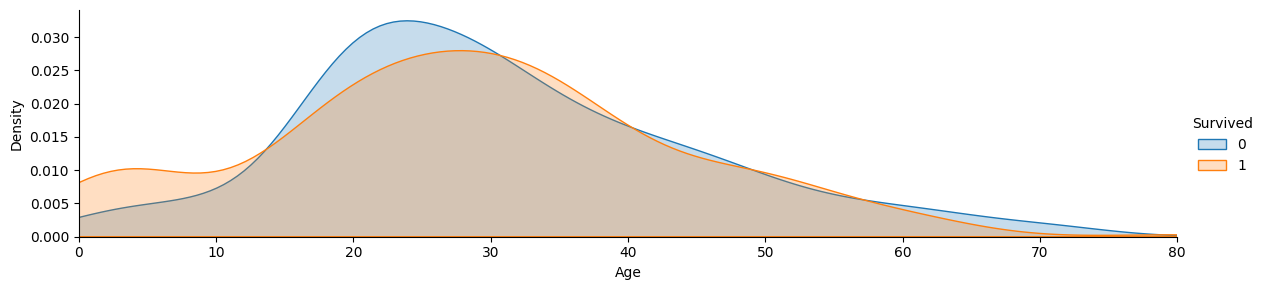

In [6]:
# peaks for survived/deceased passengers by their age
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
#facet.map(sns.histplot(data=data['Age'],
 #          color='crimson', label='train', fill=True))
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
print(data['Age'].max())



A l'anterior grafic, podem obervar la quantitat de persones que tenen una edat determinada. Podem veure que la franja d'edat més freqüentada és la de entre 20 i 30 anys.

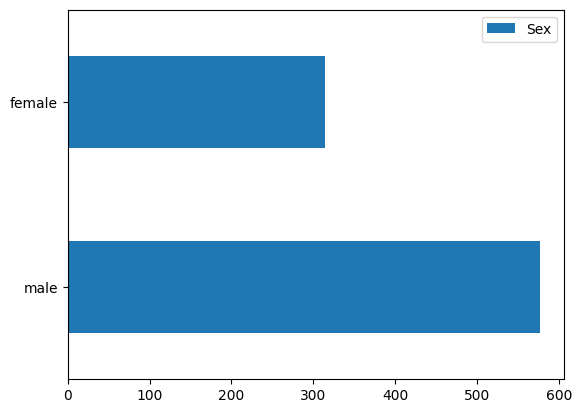

In [7]:
data.Sex.value_counts().plot(kind='barh')
plt.legend(loc="upper right")

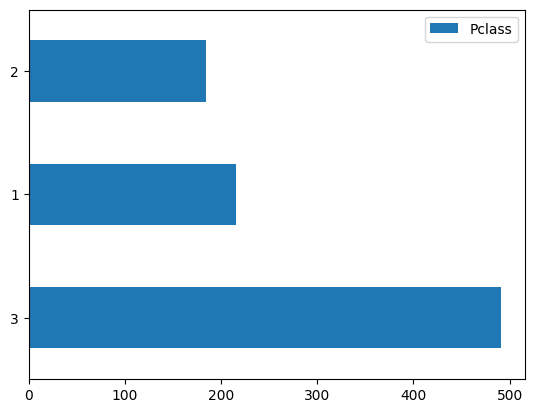

In [8]:
data.Pclass.value_counts().plot(kind='barh')
plt.legend(loc="upper right")

Com es pot observar, l'anterior gràfic mostra la quantitat de persones que pertanyen a cada una de les 3 classes de passatgers. A més, també podem observar la quantitat de morts que hi va haver de cada una d'aquestes classes 

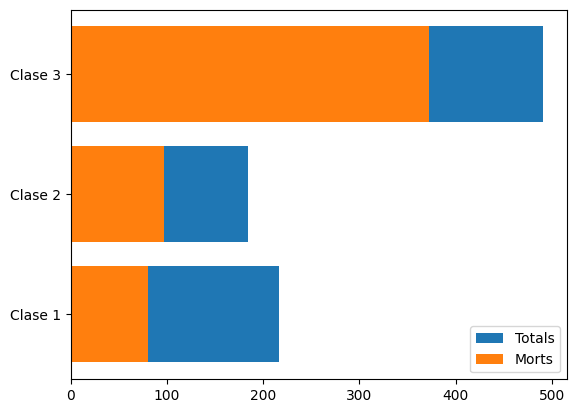

In [9]:
categories = ["Clase 1", "Clase 2", "Clase 3"]
classes = [data.loc[(data.Pclass == 1)].Pclass.value_counts()[1], data.loc[(data.Pclass == 2)].Pclass.value_counts()[2], data.loc[(data.Pclass == 3)].Pclass.value_counts()[3]]
sobreviuen = [data.loc[(data.Survived == 0) & (data.Pclass == 1)].Pclass.value_counts()[1], data.loc[(data.Survived == 0) & (data.Pclass == 2)].Pclass.value_counts()[2], data.loc[(data.Survived == 0) & (data.Pclass == 3)].Pclass.value_counts()[3]]
plt.barh(categories, classes)
plt.barh(categories, sobreviuen)
plt.legend(["Totals", "Morts"], loc="lower right", fontsize=10)
plt.show()


En el gràfic anterior, podem veure la quantitat de persones de cada classe que viatjaven al titanic i, de cada una d'aquestes classes, veure quina quantitat de ersones varen morir. Podem veure clarament que a primera classe, es varen salvar un percentatge de passatgers més alt que en els passatgers de segona i tercera classe. Aquest grafic ens fa adonar-nos que la classe del passatger és un factor important a l'hora de decidir si un passatger sobreviu o no.

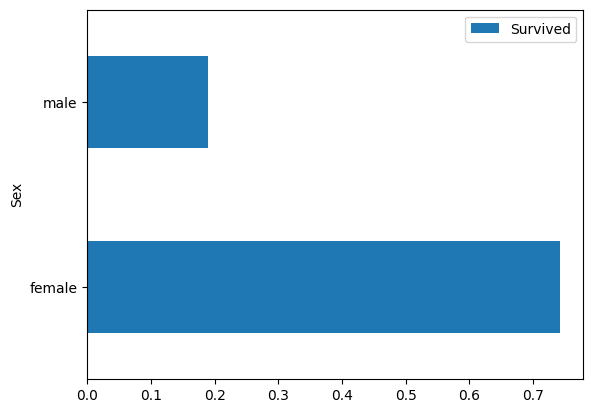

In [10]:
mitjaSupervivenciaSexe=pd.concat([data['Sex'], data['Survived']], axis=1).groupby('Sex').Survived.mean()
mitjaSupervivenciaSexe.plot(kind='barh')
plt.legend(loc="upper right")

Després d'haver explorat tot el nostre dataset del Titanic, obtenim aquestes conclusions:
#### 1.La majoria de la gent té entre 20-30 anys.
#### 2.La majoria són homes
#### 3.La majoria estava a tercera classe,suposam que era la més econòmica.
#### 4.El % de supervivència en dones és molt major que els homes, suposant que tenien lloc abans en els bots auxiliars.


### 1.2 Manipulació dades


Després d'haver observat el dataset podem eliminar diverses característiques que no ens serviran. Per exemple: PassengerId només ens serveix per a enumerar les files. A continuació eliminarem les columnes que no ens aporten gran informació respecte al percentage de supervivència.

In [11]:
data.drop(["PassengerId","Ticket","Name"],inplace=True,axis=1)
print("La quantitat de NAN's en Cabin es {}/{}".format(data['Cabin'].isna().sum(),len(data)))

La quantitat de NAN's en Cabin es 687/891


Després d'haver eliminat aquestes columnes podem observarque la columna Cabin té gran quantitat de NAN's.També podem observar que tant PassengerID com ticket i Name ens serveixen de identificadors, informació que no sirà molt relevant. Ara eliminam Cabin.

In [12]:
data=data.drop(["Cabin"],axis=1)

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Ara, després d'haver eliminat les característiques que trobam innecessàries o millor dit, no tant relevants, observarem si ens falta informació a les columnes que agafarem finalment.

In [14]:
total = data.isnull().sum().sort_values(ascending = False)
percentatge = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
ms=pd.concat([total, percentatge], axis=1, keys=['Total', 'percentatge'])
ms= ms[ms["percentatge"] > 0]
ms

,Total,percentatge
Age,177,19.865320
Embarked,2,0.224467


Com podem observar, ens falten 177 valors per a l'edat i 2 per a Embarked. Ens centrarem principalment en l'edat ja que és una característica molt més important i que té més relació amb la supervivència. La opció més viable és substituir tots aquests valors per la mitjana. A més, eliminarem les dues files amb el valor NaN de Embarked.


In [15]:
data['Age'].fillna(value=data['Age'].median(),inplace=True)

In [16]:
data.dropna(subset=['Embarked'],inplace=True)

### 1.2.3 Dades Categòriques

En aquesta fase de la neteja de dades obtindrem les dades categòriques i les transformarem a numèriques per a poder entrenar amb elles el nostre model. 

In [17]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Tenim dues columnes categòriques, el sexe i Embarked. Utilitzarem una substitució per 1 en el cas de home i 2 en el cas de dona ja que tan sols hi ha dos possibles valors. En el cas de Embarked, utilitzarem el one hot encoding(hi ha 3 possibles valors).

In [18]:
data['Sex']=data['Sex'].map({'male':1,'female':0}) #Canviam els valors de sexe
embark=data.pop('Embarked')
ohe_embark=pd.get_dummies(embark,prefix='embk')
data=pd.concat([data.reset_index(drop=True),ohe_embark.reset_index(drop=True)],axis=1,sort=False)


In [19]:
pclass=data.pop('Pclass')
ohe_class=pd.get_dummies(pclass,prefix='class')
data=pd.concat([data.reset_index(drop=True),ohe_class.reset_index(drop=True)],axis=1,sort=False)


In [20]:
data

,Survived,Sex,Age,SibSp,Parch,Fare,embk_C,embk_Q,embk_S,class_1,class_2,class_3
0,0,1,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,1,27.0,0,0,13.0000,0,0,1,0,1,0
885,1,0,19.0,0,0,30.0000,0,0,1,1,0,0
886,0,0,28.0,1,2,23.4500,0,0,1,0,0,1
887,1,1,26.0,0,0,30.0000,1,0,0,1,0,0


Com a darrera passa per a tenir les dades netes, hauríem de normalitzar les columnes amb valors numèrics alts com Age o Fare. Utilitzarem l'StandardScaler de la llibreria sklearn.

In [21]:
scaler = StandardScaler()
data.Age=scaler.fit_transform(data.Age.values.reshape(-1,1))
data.Fare=scaler.fit_transform(data.Fare.values.reshape(-1,1))
data.SibSp=scaler.fit_transform(data.SibSp.values.reshape(-1,1))
data.Parch=scaler.fit_transform(data.Parch.values.reshape(-1,1))
data

,Survived,Sex,Age,SibSp,Parch,Fare,embk_C,embk_Q,embk_S,class_1,class_2,class_3
0,0,1,-0.563674,0.431350,-0.474326,-0.500240,0,0,1,0,0,1
1,1,0,0.669217,0.431350,-0.474326,0.788947,1,0,0,1,0,0
2,1,0,-0.255451,-0.475199,-0.474326,-0.486650,0,0,1,0,0,1
3,1,0,0.438050,0.431350,-0.474326,0.422861,0,0,1,1,0,0
4,0,1,0.438050,-0.475199,-0.474326,-0.484133,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,1,-0.178396,-0.475199,-0.474326,-0.384475,0,0,1,0,1,0
885,1,0,-0.794841,-0.475199,-0.474326,-0.042213,0,0,1,1,0,0
886,0,0,-0.101340,0.431350,2.006119,-0.174084,0,0,1,0,0,1
887,1,1,-0.255451,-0.475199,-0.474326,-0.042213,1,0,0,1,0,0


In [22]:
data['Parch'].max()

6.967009721783257

Després d'haver fet la neteja de dades i obtingut la matriu de correlació ens adonem compte que els principals factors que intervenen en la predicció i que tenen més importància són aquests:

1.Pclass: amb un valor de -0.33, significa que quant menor és la classe, més probabilitats de sobreviure hi ha.
2.Sex: amb un valor de 0.54, significa que quan major sigui aquest valor major prob. de supervivència tindrà la persona. Això es dona ja que hem substituit home per 0 i dona per 1. Si fos al revés, és a dir, que dona fos un nombre inferior que home, aquesta correlació siria negeativa, al tenir més probabilitats de sobreviure quan menor sigui el nombre enter.
3.Fare: té un valor de 0.25, indica la quantitat de diners que es varen pagar. Aquesta columna va lligada amb Pclass ja que quant més es pagava, millor classe es tenia i per tant, major % de sobreviure.

## 3 Models de Classificació


### 3.1 Logistic Regression


#### 3.1.1 Entrenament

En aquesta fase, entrenarem el model i mostrarem una funció 

In [23]:
label=data['Survived']

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.35, random_state=42)
X_train.pop('Survived')
X_test.pop('Survived')

280    0
434    1
39     1
417    0
584    1
      ..
819    1
323    0
185    1
41     0
545    1
Name: Survived, Length: 312, dtype: int64

#### 3.2 Avaluació

In [24]:

logistic_reg=linear_model.LogisticRegression(tol=0.0001,C=1.0,penalty='l2',solver='lbfgs')
hist=logistic_reg.fit(X_train,y_train)

# Initialize an empty list to store the losses
losses = []

# For each epoch of training


for i in range(logistic_reg.n_iter_[0]):
    # Get the predicted probabilities for each example in the training set
    y_proba = logistic_reg.predict_proba(X_train)
    
    # Calculate the cross-entropy loss
    loss = log_loss(y_train, y_proba)
    
    # Append the loss to the losses list
    losses.append(loss)


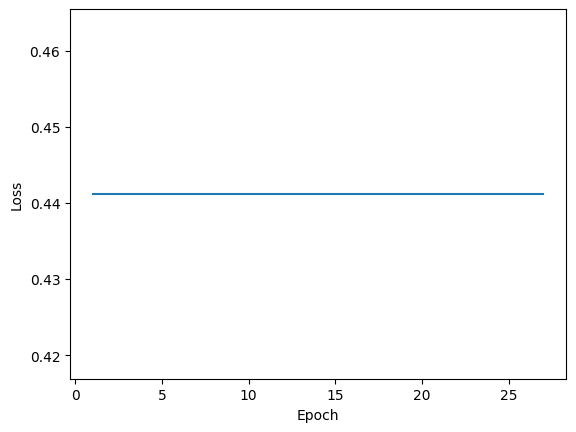

In [25]:
# Plot the loss as a function of the epoch number
plt.plot(range(1, len(losses)+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### 3.1.3 Parameter tuning

In [26]:
penal=['l1', 'l2', 'elasticnet', None]
tole=np.arange(1e-4,0.01,0.0005)
Ce=np.logspace(-3,3,7)
solv=['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
parameters={'penalty':penal,'tol':tole,'C':Ce,'solver':solv}
grid=GridSearchCV(estimator=logistic_reg,param_grid=parameters,cv = 2, n_jobs=-1)
X_train

,Sex,Age,SibSp,Parch,Fare,embk_C,embk_Q,embk_S,class_1,class_2,class_3
108,0,-0.101340,0.431350,-0.474326,-0.159991,0,1,0,0,0,1
420,1,-0.640730,-0.475199,-0.474326,-0.490509,0,1,0,0,0,1
56,0,-0.640730,-0.475199,-0.474326,-0.434807,0,0,1,0,1,0
321,0,0.052771,-0.475199,-0.474326,-0.397561,0,1,0,0,1,0
346,0,-0.101340,0.431350,-0.474326,-0.322062,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,1,-0.101340,-0.475199,-0.474326,-0.489670,0,0,1,0,0,1
270,1,-0.332507,-0.475199,-0.474326,-0.646204,0,0,1,0,0,1
860,0,1.439774,-0.475199,-0.474326,-0.124170,0,0,1,1,0,0
435,0,-0.640730,1.337900,2.006119,0.045870,0,0,1,0,0,1


In [27]:

grid.fit(X_train, y_train)



C:\Users\Jaume\miniconda3\envs\ia2022\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4760 fits failed out of a total of 6720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jaume\miniconda3\envs\ia2022\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jaume\miniconda3\envs\ia2022\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Jaume\miniconda3\envs\ia2022\lib\site-packages\sklearn\linear_model\_logistic.p

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': array([0.0001, 0.0006, 0.0011, 0.0016, 0.0021, 0.0026, 0.0031, 0.0036,
       0.0041, 0.0046, 0.0051, 0.0056, 0.0061, 0.0066, 0.0071, 0.0076,
       0.0081, 0.0086, 0.0091, 0.0096])})

In [28]:
grid.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.0091}

## 1.4 Avaluació


In [29]:
prediccio=logistic_reg.predict(X_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediccio,y_test)*100,2))

The accuracy of the Logistic Regression is 81.73


## 1.5 Funció avaluació segons test size


In [30]:
x=np.arange(0.05, 0.80, 0.01, dtype=float)
y=[]
for i in x:
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=i, random_state=42)
    X_train.pop('Survived')
    X_test.pop('Survived')
    logistic_reg=linear_model.LogisticRegression()
    hist=logistic_reg.fit(X_train,y_train)
    prediccio=logistic_reg.predict(X_test)
    y.append(round(accuracy_score(prediccio,y_test)*100,2))

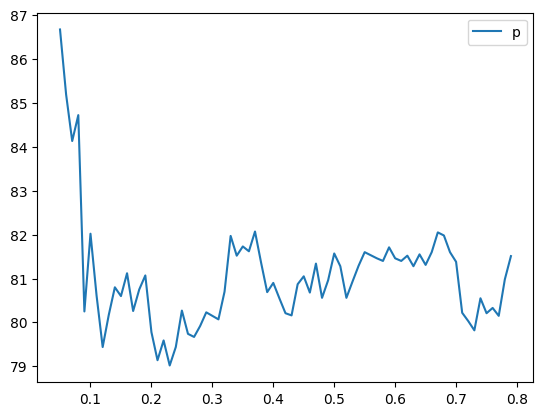

In [31]:
y
plt.plot(x,y)
plt.show
plt.legend("percentatge de precisió segons la distribució train-test",loc="upper right")

In [32]:
percep=linear_model.Perceptron()
percep.fit(X_train,y_train)
importance=percep.coef_
print(importance)
# plot feature importance

[[-5.          0.23576701 -2.7634968  -0.9486517   0.67886545  1.
   0.          1.          1.          1.          0.        ]]


In [33]:
predict=percep.predict(X_test)


In [34]:
x=np.arange(0.05, 0.80, 0.01, dtype=float)
y=[]
for i in x:
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=i, random_state=42)
    X_train.pop('Survived')
    X_test.pop('Survived')
    percep=linear_model.Perceptron(tol=1e-3,random_state=0)
    percep.fit(X_train,y_train)
    prediccio=logistic_reg.predict(X_test)
    y.append(round(accuracy_score(prediccio,y_test)*100,2))

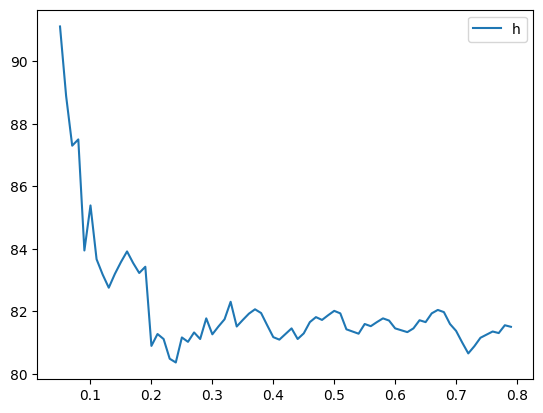

In [35]:
y
plt.plot(x,y)
plt.show
plt.legend("hola",loc="upper right")

In [36]:
print("Accuracy: "+str(accuracy_score(predict,y_test)))

Accuracy: 0.701280227596017


In [37]:
from sklearn import tree

In [38]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 4)
decision_tree.fit(X_train, y_train)
predict=decision_tree.predict(X_test)
print("Accuracy: "+str(accuracy_score(predict,y_test)))

Accuracy: 0.7894736842105263
